# 1. Data Understanding
This notebook expands on the data understanding phase for the Mushroom Classification project, using descriptive statistics, visualizations, and unsupervised learning techniques where appropriate.

0. Sampling Strategy
1. Summary Statistics
2. Class Distribution
3. Feature Distribution
4. Feature Correlation
5. Missing Values
6. Duplicates
7. Outliers
8. PCA Visualization
9. KMeans Clustering
10. Conclusions

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
import math
import scipy.stats as ss

sns.set(style="whitegrid")

In [32]:
# Load dataset
df = pd.read_csv('./Data/train.csv')
df_full = df.copy()
print("Train dataset shape:", df.shape)

Train dataset shape: (3116945, 22)


## 0.1 Sampling Strategy

To improve efficiency and maintain reproducibility, a random sample of 100,000 rows was taken from the full dataset (~3.1M rows). Sampling preserves the original class distribution using a fixed random seed (42).


In [33]:
df = df.sample(n=100_000, random_state=42).reset_index(drop=True)
print("Sampled dataset shape:", df.shape)
df.head()

Sampled dataset shape: (100000, 22)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1356763,p,7.82,s,t,r,t,d,NaN,g,...,NaN,t,g,NaN,NaN,f,f,NaN,d,a
1,2369311,p,3.20,o,NaN,g,f,f,f,f,...,NaN,g,n,NaN,NaN,f,f,NaN,d,s
2,1146527,e,9.36,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,NaN,w,t,g,NaN,d,a
3,889383,p,6.52,s,d,e,t,d,c,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a
4,416134,p,3.13,b,t,n,f,NaN,NaN,n,...,NaN,NaN,w,NaN,NaN,t,NaN,k,g,u


## 0.2 Comparing full dataset and sample

To verify the representativeness of the 100k subsample, we compared the distributions of key numeric features against the full dataset of 3.1M records.

In [10]:
print("Target distribution (full):")
print(df_full['class'].value_counts(normalize=True))

print("Target distribution (sample):")
print(df['class'].value_counts(normalize=True))


Target distribution (full):
class
p    0.547137
e    0.452863
Name: proportion, dtype: float64
Target distribution (sample):
class
p    0.54687
e    0.45313
Name: proportion, dtype: float64


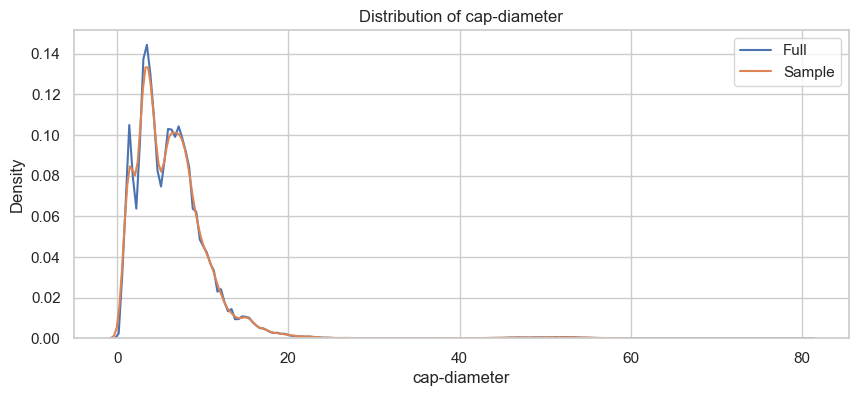

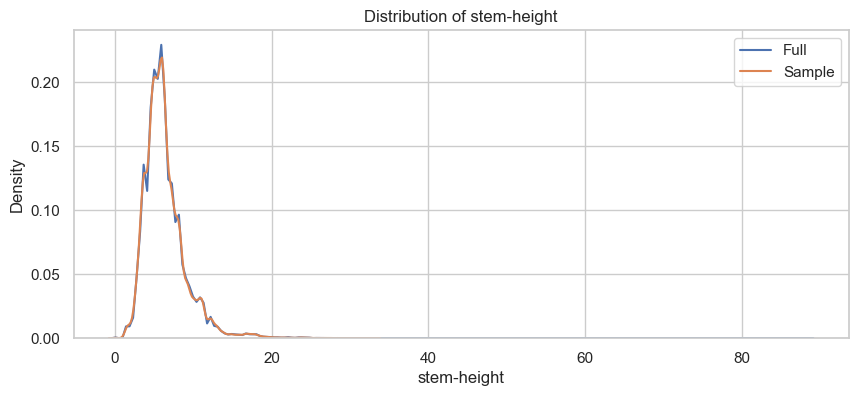

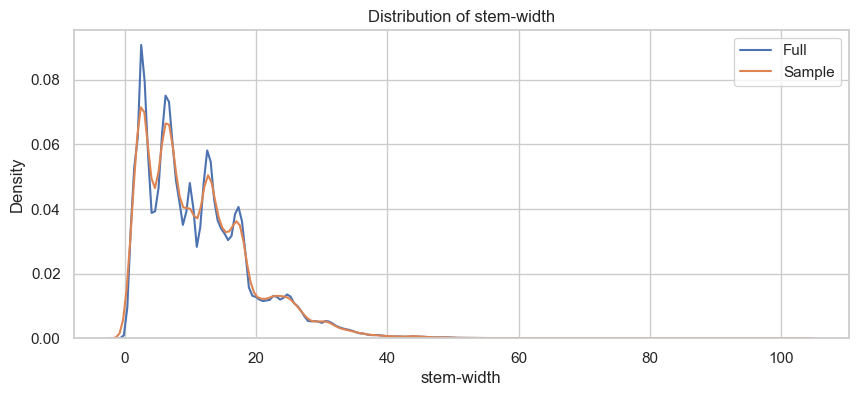

In [11]:
for col in df.columns:
    if df[col].dtype == 'float64':
        numeric_col = col

        plt.figure(figsize=(10, 4))
        sns.kdeplot(df_full[numeric_col], label="Full", bw_adjust=1)
        sns.kdeplot(df[numeric_col], label="Sample", bw_adjust=1)
        plt.title(f'Distribution of {numeric_col}')
        plt.legend()
        plt.show()




As shown in the density plots for the numeric columns, the subsample closely mirrors the distribution of the full data. The target class also shows a similar distribution between both sets.

This supports the conclusion that the sampling approach preserves statistical properties of the original data and is suitable for exploratory analysis and model development.

## 1. Summary Statistics

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100000.0,NaN,NaN,NaN,1561406.64521,899166.973082,27.0,779448.0,1565451.0,2340345.0,3116928.0
class,100000,2,p,54687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-diameter,100000.0,NaN,NaN,NaN,6.295558,4.630139,0.4,3.31,5.75,8.24,58.4
cap-shape,99998,15,x,45835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,78312,18,t,14725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-color,100000,20,n,43641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
does-bruise-or-bleed,100000,3,f,82397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,83172,19,a,20748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,59535,7,c,42475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-color,99998,24,w,29816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The summary statistics reveal that several numerical features, such as stem-width and cap-diameter, exhibit high variance and contain extreme values, indicating the presence of outliers. Many categorical features show high cardinality (e.g., cap-color, gill-color), which may require grouping or careful encoding. Additionally, multiple features suffer from substantial missing data—most notably stem-root, veil-type, and stem-surface—which will need to be addressed during data preparation. The class distribution in features like does-bruise-or-bleed and ring-type is also notably imbalanced, suggesting dominant categories that could bias models if not handled properly. Lastly, the id column consists entirely of unique values and does not contribute useful information, so it should be excluded from analysis.

## 2. Domain Knowledge

The dataset includes a range of **morphological and ecological features** used to describe mushrooms. These attributes are mostly categorical and are derived from visual inspection or environmental context. Below is a description of all the columns:

| **Feature**              | **Description** |
|--------------------------|-----------------|
| `cap-diameter`           | Estimated diameter of the mushroom cap (numeric). |
| `cap-shape`              | Shape of the cap — e.g., bell, conical, convex, flat, knobbed, sunken. |
| `cap-surface`            | Surface texture of the cap — e.g., smooth, scaly, fibrous. |
| `cap-color`              | Observed color of the cap. |
| `does-bruise-or-bleed`   | Whether the mushroom bruises or bleeds when damaged (true/false). |
| `gill-attachment`        | How the gills attach to the stem — e.g., free, attached, decurrent. |
| `gill-spacing`           | Distance between gills — e.g., close, crowded, distant. |
| `gill-color`             | Color of the gills on the underside of the cap. |
| `stem-height`            | Height of the mushroom's stem (numeric). |
| `stem-width`             | Width of the stem (numeric). |
| `stem-root`              | Type or structure of the root/base of the stem. |
| `stem-surface`           | Surface texture of the stem. |
| `stem-color`             | Observed color of the stem. |
| `veil-type`              | Type of veil covering the gills (if any). Often uniform. |
| `veil-color`             | Color of the veil (if present). |
| `has-ring`               | Indicates if a ring is present on the stem. |
| `ring-type`              | Type of ring present, if any — e.g., evanescent, pendant. |
| `spore-print-color`      | Color of the spore print, obtained by placing cap on paper. |
| `habitat`                | Typical habitat of the mushroom — e.g., grasses, woods, paths. |
| `season`                 | Season when the mushroom is typically found — e.g., spring, summer, autumn. |
| `class`                  | **Target variable**: `e` for edible, `p` for poisonous. |

> Note: Several columns contain missing values (`unknown`) or rare categories. These should be handled carefully to avoid bias or noise during training.

> Note: This is a synthetic dataset created for a competition. There is no information available about what each unique value means.

## 3. Class Distribution

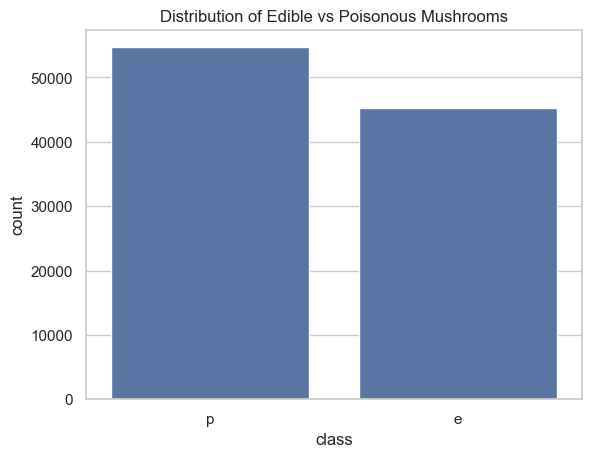

class
p    0.54687
e    0.45313
Name: proportion, dtype: float64

In [13]:
sns.countplot(x='class', data=df)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()
df['class'].value_counts(normalize=True)

The target variable (class) distinguishes between edible and poisonous mushrooms. The distribution shows that approximately 55% of the samples are labeled as poisonous (p), while the remaining 45% are edible (e). This slight imbalance is not severe and should not significantly bias most classification algorithms. However, it may still be beneficial to monitor performance using class-sensitive metrics like F1-score or recall, particularly to avoid misclassifying poisonous mushrooms as edible, and testing different sampling techniques to look for possible improvements.

## 4. Feature Distributions

In [14]:
feature_types = df.dtypes.value_counts()

categorical_features = df.select_dtypes(include='object').drop(columns='class').columns.tolist()
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns='id').columns.tolist()


print("Feature Types Summary:")
print(feature_types)

print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

Feature Types Summary:
object     18
float64     3
int64       1
Name: count, dtype: int64
Categorical Features: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Numeric Features: ['cap-diameter', 'stem-height', 'stem-width']


### Distribution of Numerical Features

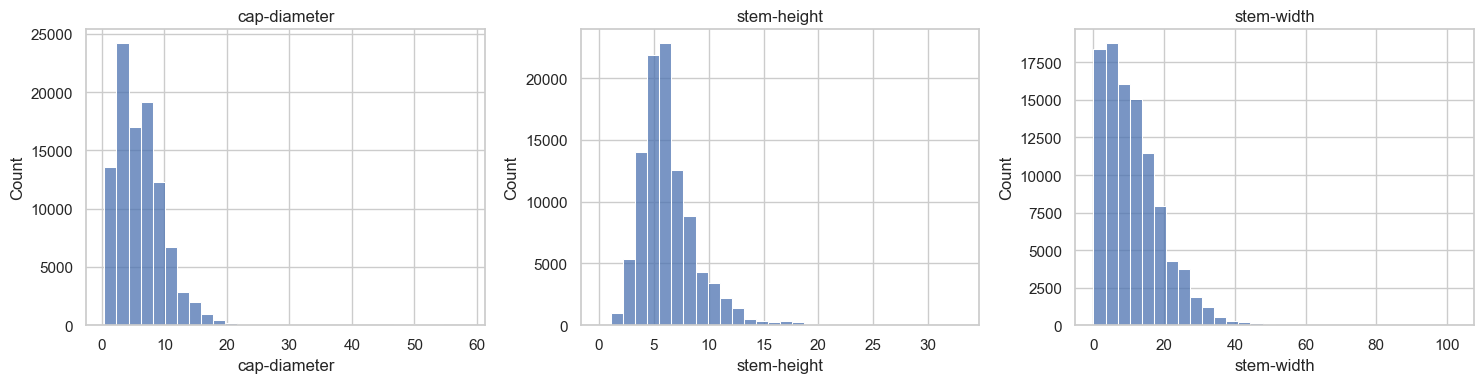

In [15]:
num_features = len(numeric_features)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], bins=30, kde=False, ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Distribution of Categorical Features

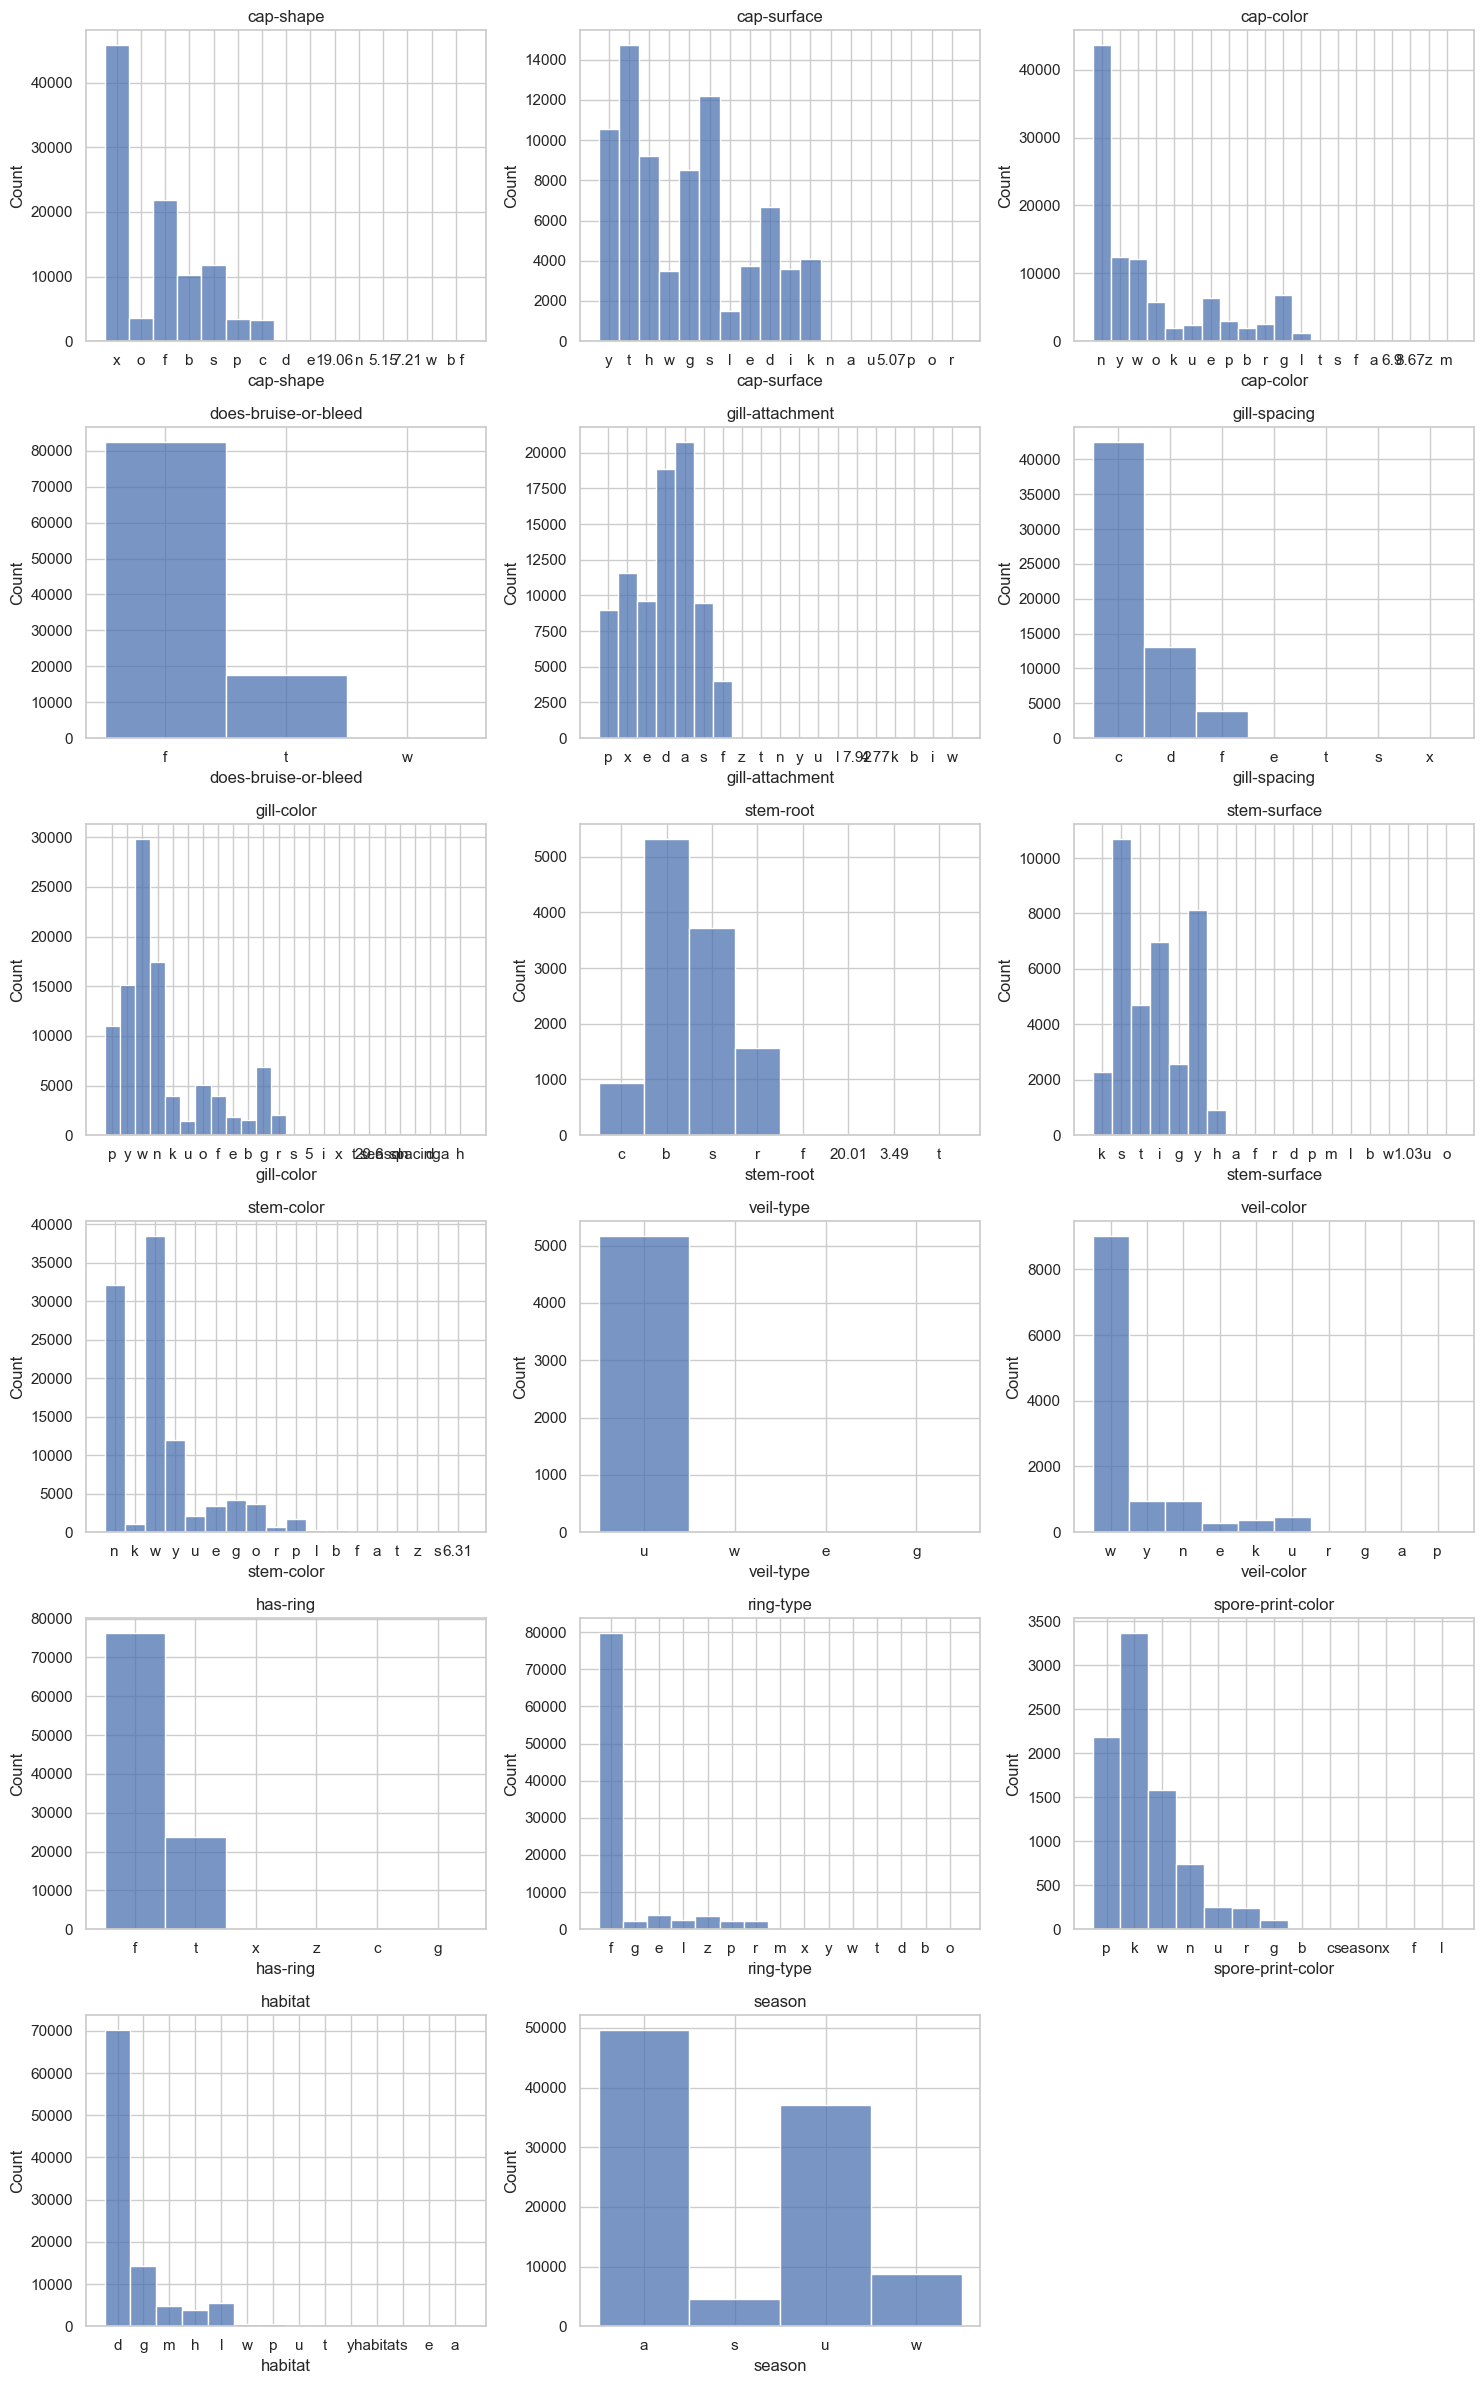

In [16]:
num_features = len(categorical_features)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.histplot(df[feature], bins=30, kde=False, ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Top Value Frequencies for Selected Categorical Features

In [17]:
for col in categorical_features:
    print(f"\nTop values in '{col}':")
    print(df[col].value_counts(dropna=False).head(10))


Top values in 'cap-shape':
cap-shape
x      45835
f      21906
s      11734
b      10191
o       3518
p       3474
c       3329
d          4
NaN        2
e          1
Name: count, dtype: int64

Top values in 'cap-surface':
cap-surface
NaN    21688
t      14725
s      12189
y      10540
h       9202
g       8522
d       6680
k       4093
e       3750
i       3606
Name: count, dtype: int64

Top values in 'cap-color':
cap-color
n    43641
y    12407
w    12093
g     6795
e     6306
o     5753
p     2938
r     2519
u     2359
b     1981
Name: count, dtype: int64

Top values in 'does-bruise-or-bleed':
does-bruise-or-bleed
f    82397
t    17602
w        1
Name: count, dtype: int64

Top values in 'gill-attachment':
gill-attachment
a      20748
d      18843
NaN    16828
x      11558
e       9586
s       9482
p       8959
f       3979
y          2
n          2
Name: count, dtype: int64

Top values in 'gill-spacing':
gill-spacing
c      42475
NaN    40465
d      13101
f       3954
e          2


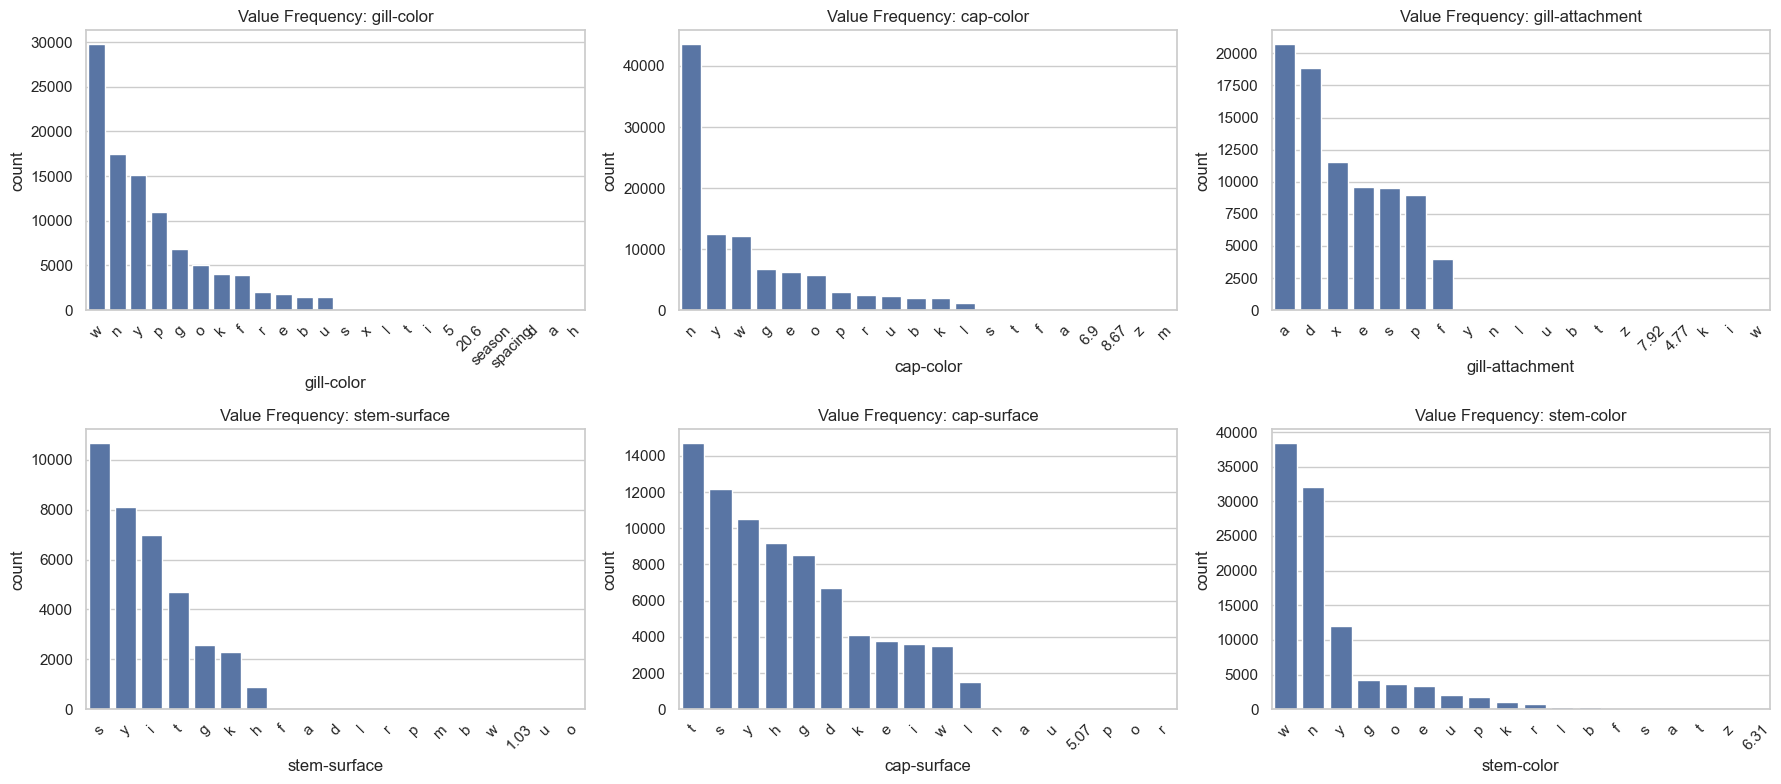

In [18]:
top_cat = sorted(categorical_features, key=lambda col: df[col].nunique(), reverse=True)[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(top_cat):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Value Frequency: {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Feature Importance Preview

In [19]:
# Encode target as binary if not already
y = LabelEncoder().fit_transform(df['class'])

# One-hot encode categorical features
X = pd.get_dummies(df[categorical_features], drop_first=True)

# Apply Chi-Square test
chi_scores, p_values = chi2(X, y)

# Wrap in DataFrame for easy viewing
chi_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

# Show top features
chi_results.head(10)


,Feature,Chi2 Score,p-value
171,ring-type_z,2869.911668,0.0
138,stem-color_w,2715.712271,0.0
62,gill-attachment_p,2404.423872,0.0
110,stem-surface_g,2100.826833,0.0
2,cap-shape_b,2027.621942,0.0
87,gill-color_n,2007.600014,0.0
20,cap-surface_k,1984.306040,0.0
26,cap-surface_s,1643.148423,0.0
34,cap-color_e,1626.875319,0.0
56,gill-attachment_e,1606.170707,0.0


The feature distribution analysis reveals that the dataset includes a mix of 18 categorical and 3 numerical features. Histograms for numeric variables such as stem-width and cap-diameter show strong right-skew and the presence of outliers. Categorical value counts indicate heavy dominance by certain categories (e.g., cap-shape = x), while some features have many rare values or missing data (e.g., veil-type, stem-root). A chi-squared test for feature importance ranked several one-hot encoded features (like ring-type_z and stem-color_w) as strongly associated with the target class, supporting their relevance in supervised models. This analysis informs both preprocessing steps and feature selection strategies for modeling.

## 5. Feature Correlation

### Correlation Heatmap

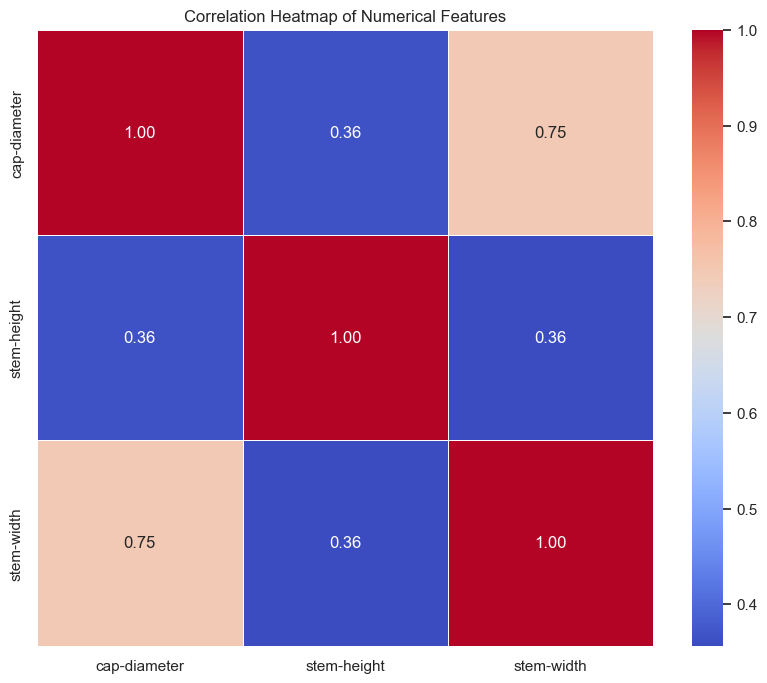

In [20]:
# Compute correlation matrix for numeric features
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


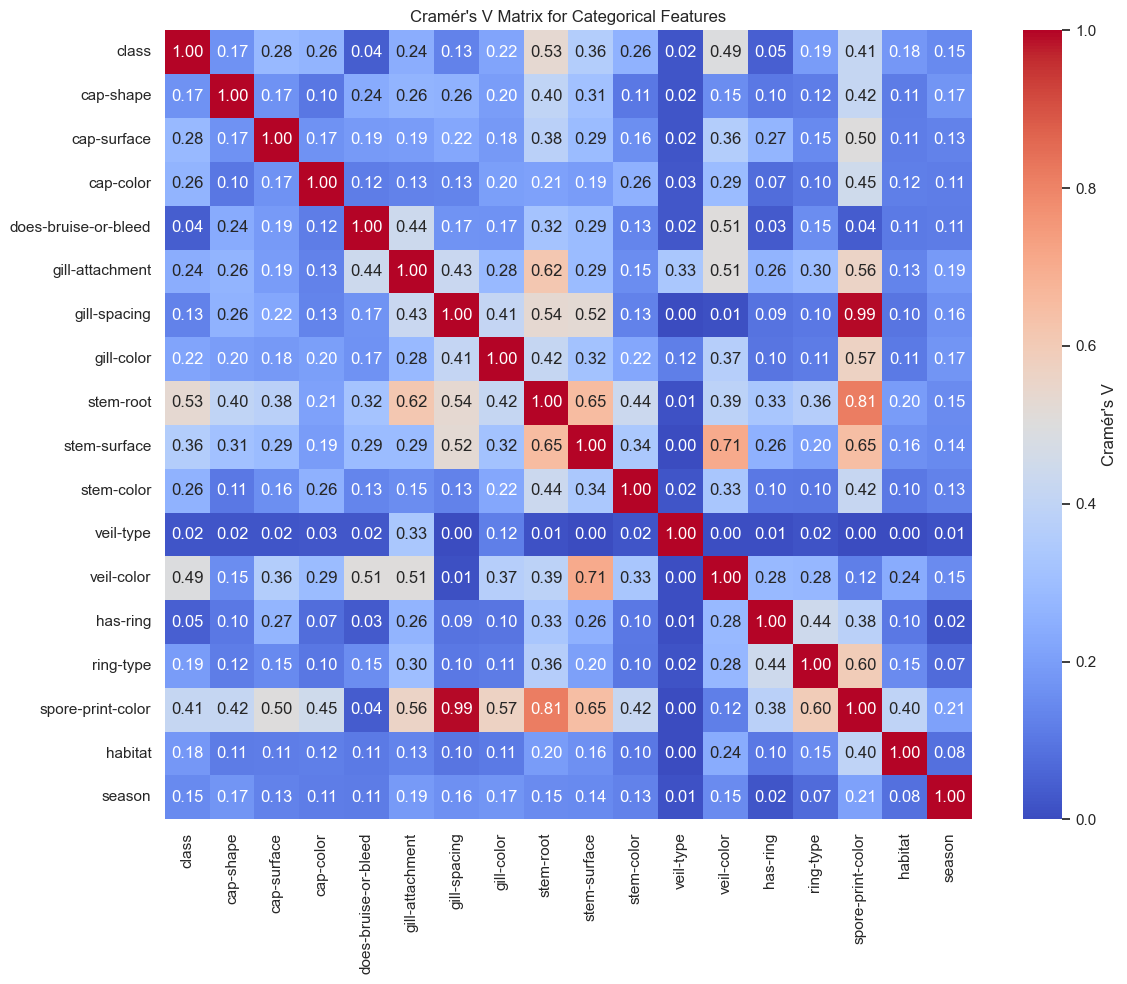

In [21]:
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    n_rows, n_cols = ct.shape
    if n_rows < 2 or n_cols < 2:
        return 0.0
    chi2 = ss.chi2_contingency(ct, correction=False)[0]
    total = ct.values.sum()
    phi2 = chi2 / total
    return np.sqrt(phi2 / min(n_cols - 1, n_rows - 1))


cat_cols = [
    col for col in df.select_dtypes(['object', 'category']).columns
    if df[col].nunique() > 1
]

cramers_matrix = pd.DataFrame(
    np.zeros((len(cat_cols), len(cat_cols))),
    index=cat_cols, columns=cat_cols
)

for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i:], start=i):
        v = cramers_v(df[col1], df[col2])
        cramers_matrix.loc[col1, col2] = v
        cramers_matrix.loc[col2, col1] = v


plt.figure(figsize=(12, 10))
sns.heatmap(
    cramers_matrix,
    annot=True, fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': "Cramér's V"}
)
plt.title("Cramér's V Matrix for Categorical Features")
plt.tight_layout()
plt.show()

### Pairplots

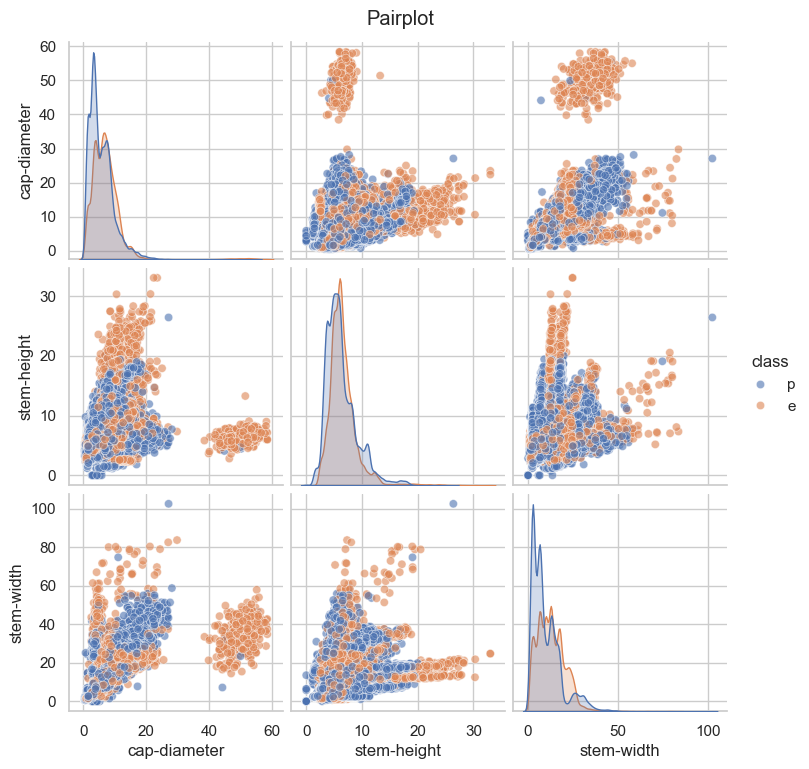

In [22]:
# Create pairplot
sns.pairplot(df[numeric_features + ['class']], hue='class', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot", y=1.02)
plt.show()


### Categorical Class Distributions

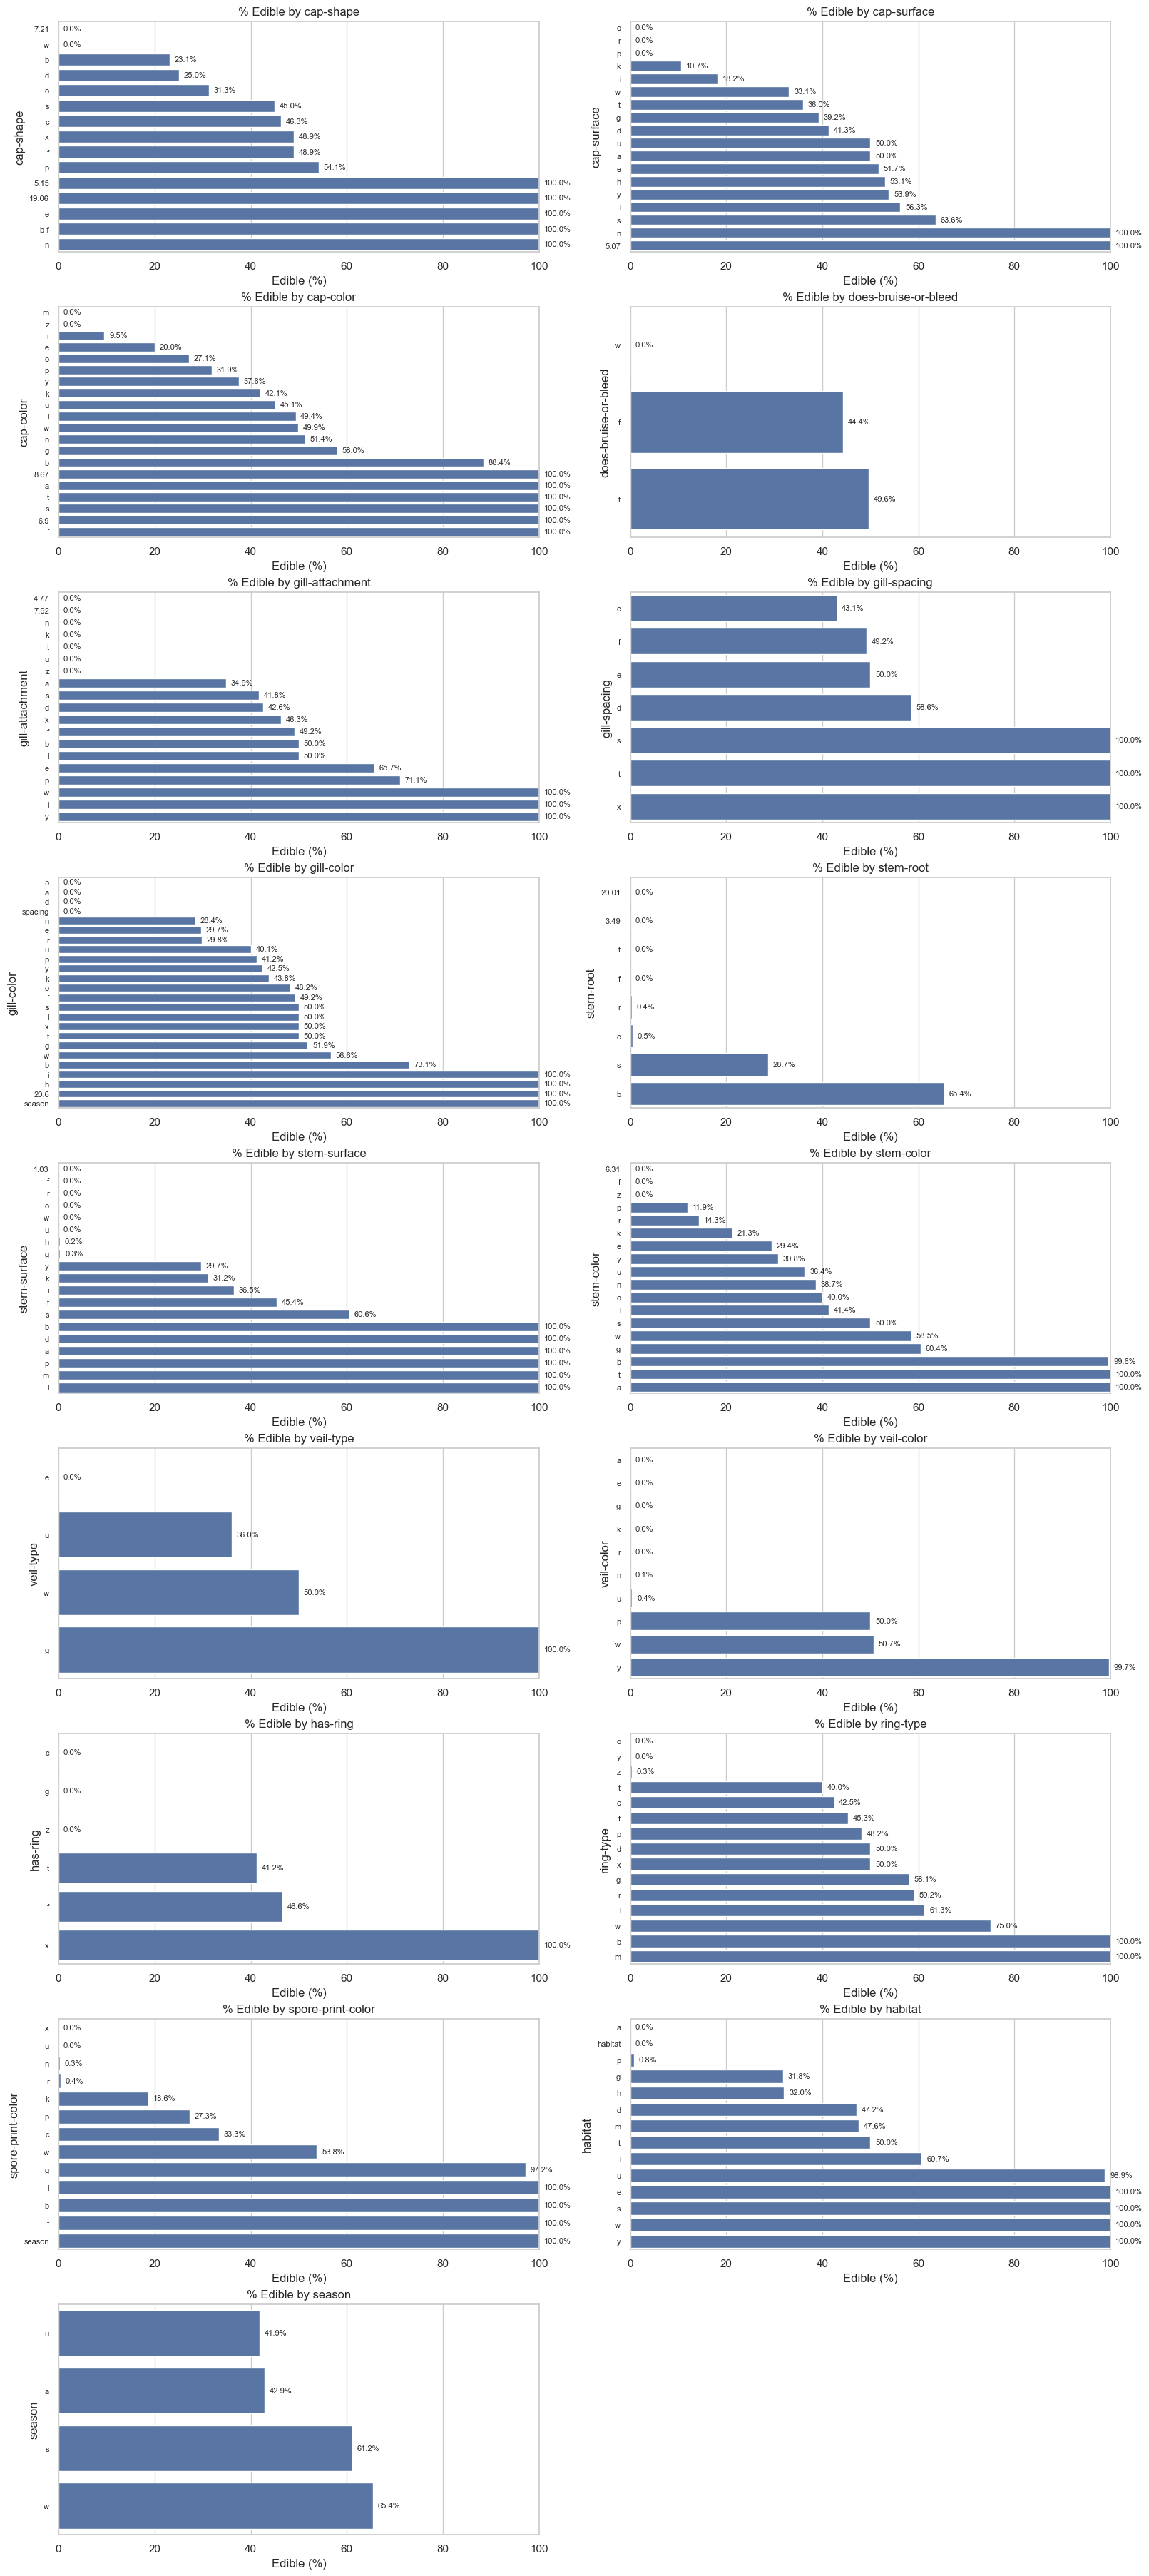

In [34]:
cat_cols = [c for c in cat_cols if c != 'class']
n_plots = len(cat_cols)
cols = 2
rows = math.ceil(n_plots / cols)

fig, axes = plt.subplots(rows, cols, 
                         figsize=(8*cols, 4*rows),
                         constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    props = (
        df.groupby(col)['class']
          .apply(lambda s: (s == 'e').mean() * 100)
          .sort_values(ascending=True)
    )
    
    sns.barplot(
        ax=ax,
        y=props.index,
        x=props.values,
        orient='h'
    )
    ax.set_title(f"% Edible by {col}")
    ax.set_xlabel("Edible (%)")
    ax.set_ylabel(col)
    ax.set_xlim(0, 100)

    for i, pct in enumerate(props.values):
        ax.text(pct + 1, i, f"{pct:.1f}%", va='center', fontsize=8)

    ax.tick_params(axis='y', labelsize=8)

for extra_ax in axes[n_plots:]:
    fig.delaxes(extra_ax)

plt.show()

The correlation heatmap for the numeric features revealed moderate positive correlation (0.75) between cap-diameter and stem-width, while other feature pairs showed weaker relationships. This suggests limited multicollinearity among numerical features, so all may be retained for modeling. Pairplots provided additional visual insight into the structure of the data, showing some class-related patterns in the distribution and interaction of numeric features, especially for cap-diameter and stem-width. However, the overlap between classes remains substantial.

For categorical features, Cramér's V — a metric for measuring association between categorical variables — showed that most feature pairs had weak associations (V < 0.3). However, some stronger relationships were observed, such as between spore-print-color and gill-spacing. These associations may be useful for future feature grouping or dimensionality reduction.Additionally, horizontal bar plots displaying the percentage of edible samples per category, revealed that several categorical features are strongly class-discriminative. 

Overall, these correlation analyses indicates that numerical features alone may not suffice for accurate classification. Incorporating categorical variables — and accounting for both redundancy and inter-feature relationships — will be critical for building robust predictive models.

## 6. Missing values

In [203]:
summary_df = pd.DataFrame({
    'Unique Values': df.nunique(),
    'Missing Values': df.isnull().sum()
}).sort_values(by='Unique Values', ascending=False)

summary_df

,Unique Values,Missing Values
id,100000,0
stem-width,3926,0
cap-diameter,2362,0
stem-height,1911,0
gill-color,24,2
cap-color,20,0
stem-surface,19,63689
gill-attachment,19,16828
cap-surface,18,21688
stem-color,18,0


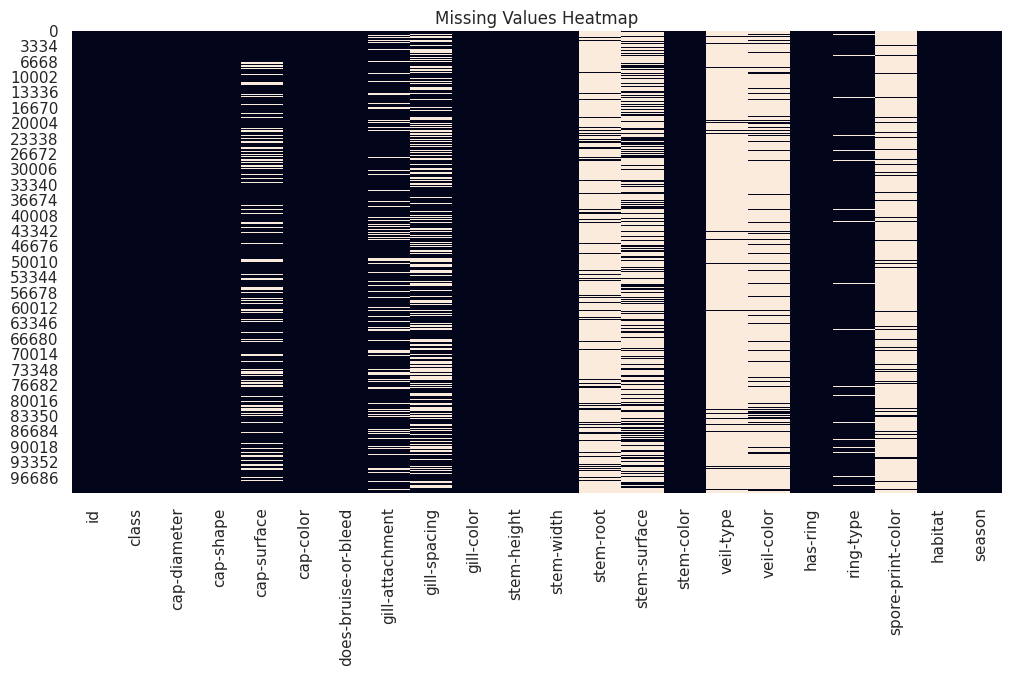

In [204]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


The dataset contains varying levels of missing data across several features. While most variables are complete, a few such as veil-type, veil-color, stem-root, stem-surface, and gill-spacing have substantial missingness, with veil-type missing in over 94% of entries. These features may either need to be dropped or imputed with a placeholder category (e.g., "unknown") depending on their relevance to modeling. A heatmap visualization confirms that missingness is concentrated within specific columns and does not appear to affect entire rows, which supports a column-wise treatment strategy.

## 7. Duplicates

In [205]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


## 8. Outliers

### Z-Scores

In [206]:
z_scores = pd.DataFrame(stats.zscore(df[numeric_features]), columns=numeric_features)
print(z_scores.describe().round(2))

outlier_counts = (z_scores.abs() > 3).sum()
print("Number of outliers (|z| > 3) per feature:")
print(outlier_counts)

       cap-diameter  stem-height  stem-width
count     100000.00    100000.00   100000.00
mean           0.00         0.00       -0.00
std            1.00         1.00        1.00
min           -1.27        -2.36       -1.38
25%           -0.64        -0.62       -0.76
50%           -0.12        -0.17       -0.19
75%            0.42         0.40        0.55
max           11.25         9.95       11.26
Number of outliers (|z| > 3) per feature:
cap-diameter     743
stem-height     1622
stem-width      1011
dtype: int64


### Box Plots

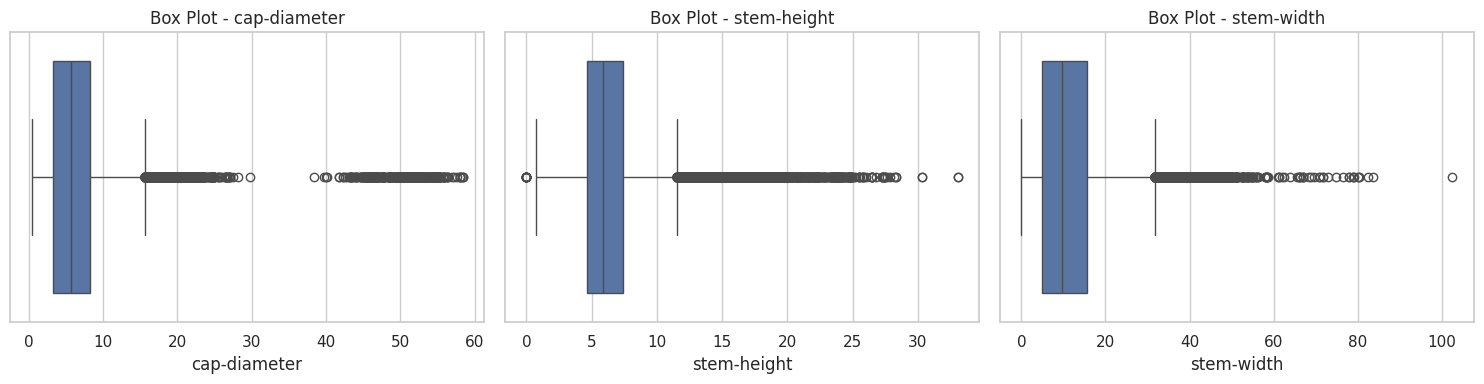

In [207]:
num_features = len(numeric_features)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot - {feature}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Outlier analysis using z-scores revealed that all three numerical features contain values exceeding 3 standard deviations from the mean, with stem-height having the highest number of outliers (over 1600). Box plots visually confirm the presence of extreme values and demonstrate significant right skew in all numeric distributions. These findings indicate that the dataset may benefit from outlier mitigation strategies such as log transformation, robust scaling, or capping, especially if these variables are to be used in distance-based models or clustering.

## 9. PCA Visualization

In [208]:
# Fill missing values with the mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        
# Check for missing values again
missing_values = df.isnull().sum()
print("Missing values after filling:")
print(missing_values[missing_values > 0])

Missing values after filling:
Series([], dtype: int64)


/tmp/ipykernel_7446/864835526.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [209]:
# Encode and scale features

features = df.drop(columns=['class', 'id'])
labels = df['class']

# One-hot encoding for categorical features
encoded_features = pd.get_dummies(features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)

In [210]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(scaled_features)
reduced_df = pd.DataFrame(reduced, columns=['PC1', 'PC2', 'PC3'])
reduced_df['class'] = labels

# Explained variance ratio
explained_variance_cleaned = pca.explained_variance_ratio_

# Identifying the most relevant features for each component
pca_components = pd.DataFrame(
    pca.components_,
    columns=encoded_features.columns,
    index=[f'PC{i+1}' for i in range(3)]
)

# Display the most relevant features for each principal component
print("Most Relevant Features for Each Principal Component:")
for i, component in enumerate(pca_components.index):
    print(f"\n{component}:")
    top_features = pca_components.loc[component].abs().nlargest(5)
    print(top_features)

# Displaying explained variance
print("\nExplained Variance Ratio for Each Component:")
print(explained_variance_cleaned)

Most Relevant Features for Each Principal Component:

PC1:
ring-type_f          0.362924
has-ring_f           0.347688
has-ring_t           0.347668
gill-attachment_e    0.242709
stem-height          0.227355
Name: PC1, dtype: float64

PC2:
gill-attachment_f    0.391177
gill-color_f         0.390938
gill-spacing_f       0.390237
cap-shape_o          0.288522
stem-width           0.260446
Name: PC2, dtype: float64

PC3:
cap-diameter              0.320805
stem-width                0.316091
does-bruise-or-bleed_t    0.265684
gill-attachment_a         0.240159
gill-attachment_p         0.214374
Name: PC3, dtype: float64

Explained Variance Ratio for Each Component:
[0.02584797 0.0202153  0.01820505]


Text(0.5, 0.92, '3D PCA Plot')

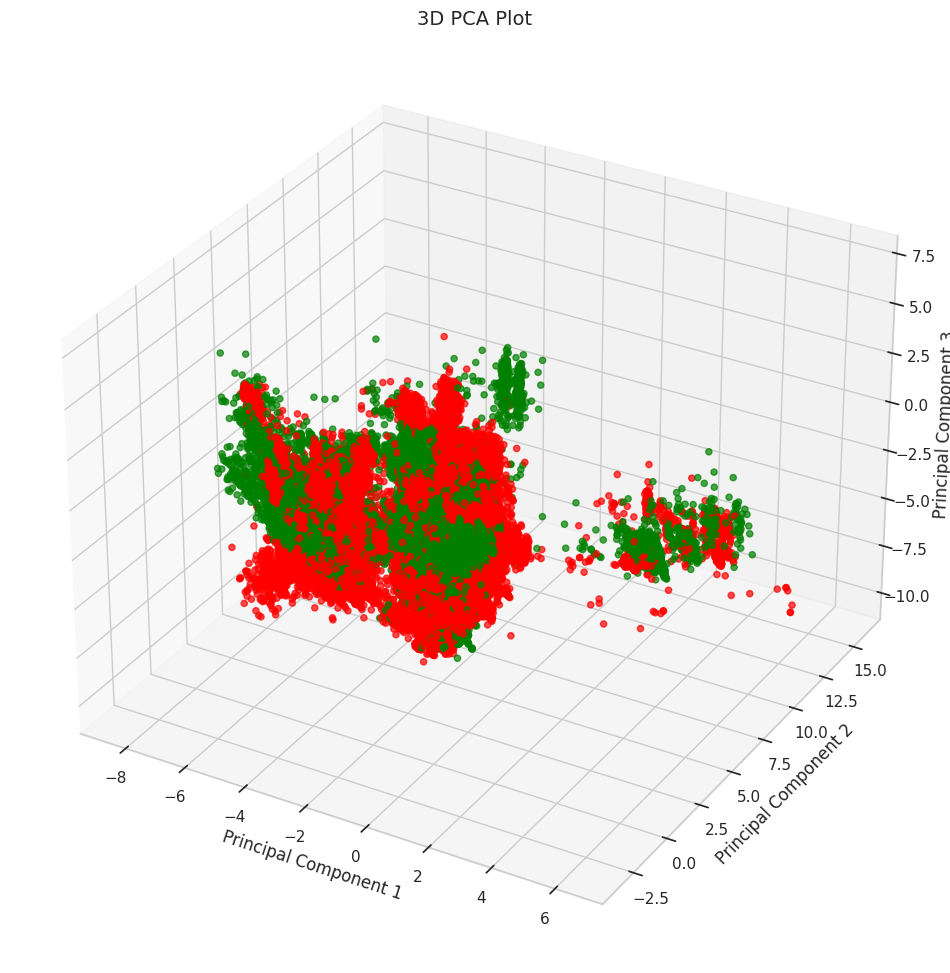

In [211]:
# Create a 3D scatter plot of the first 3 principal components 
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
label_colors = labels.map({'e': 'green', 'p': 'red'})
ax.scatter(reduced_df['PC1'], reduced_df['PC2'], reduced_df['PC3'], c=label_colors, alpha=0.7)


# Labels and title
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D PCA Plot', fontsize=14)

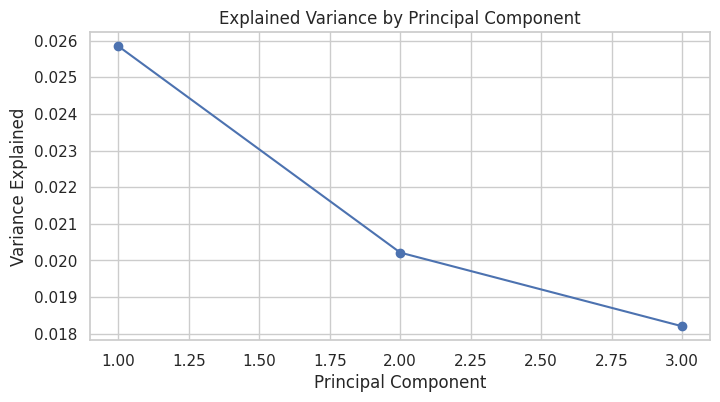

In [212]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

Principal Component Analysis (PCA) was applied to the one-hot encoded and standardized dataset to reduce dimensionality and explore structure. While each of the top three components explains a relatively small portion of the total variance (~2–2.5%), they collectively capture distinct combinations of features that help differentiate between classes. The top contributors to these components include ring-type_f, gill-attachment_f, and cap-diameter, among others. The 3D scatter plot of the reduced space shows partial visual separation between edible and poisonous mushrooms, supporting the potential value of PCA for visualization and feature extraction, though it may not be sufficient alone for classification. Unfortunately this result shows that PCA will not be a good method to reduce the dimensionality of the dataset in future phases.

## 10. KMeans Clustering (k=2)

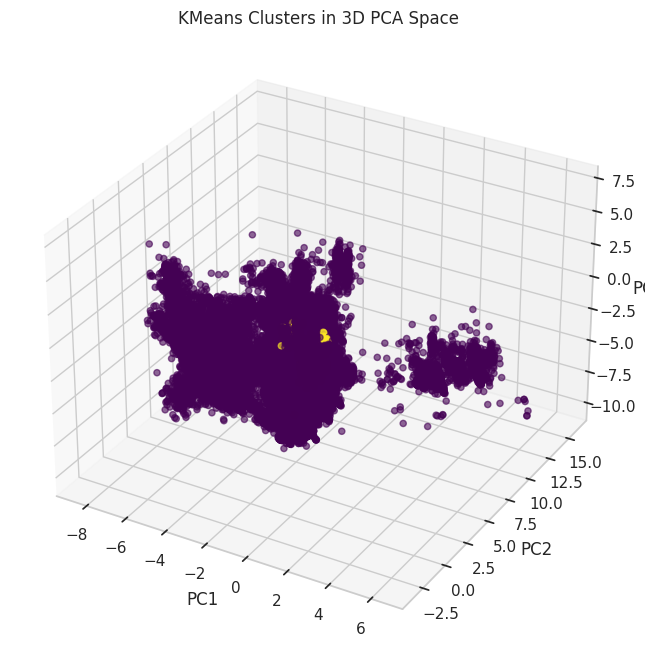

In [213]:
# Perform KMeans clustering on the scaled features
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the PCA DataFrame
reduced_df['cluster'] = clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    reduced_df['PC1'], reduced_df['PC2'], reduced_df['PC3'],
    c=reduced_df['cluster'], cmap='viridis', alpha=0.6
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clusters in 3D PCA Space')
plt.show()


### Cluster vs Class Label Alignment

In [214]:
pd.crosstab(reduced_df['cluster'], reduced_df['class'])

class,e,p
cluster,,
0,45105,53148
1,208,1539


### Silhouette Score for Cluster Quality

In [215]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, reduced_df['cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.06


KMeans clustering with k=2 was applied to the scaled dataset to explore natural groupings aligned with the binary class label. A 3D scatter plot in PCA space revealed weak visual separation between clusters. This was confirmed by a silhouette score of only 0.06, indicating poor cohesion and separation. The cluster vs class label comparison showed that the majority of edible and poisonous mushrooms were grouped into the same cluster, suggesting that KMeans does not capture meaningful class distinctions in this dataset. These findings reinforce that unsupervised clustering is not a suitable substitute for supervised classification in this context.

During testing, different sample sizes (e.g., 5k, 10k, 15k rows) led to significantly different silhouette scores and clustering outcomes. This suggests that the structure inferred from clustering is sensitive to sample composition.

While using the full dataset (~3.1M rows) might reveal more stable patterns, it is currently computationally unfeasible within the project's constraints. Future work could explore clustering on a stratified or more optimized subset, or employ dimensionality reduction and clustering methods that scale better to large datasets.

## 11. Conclusions

This exploratory analysis examined a 100,000-row sample of a mushroom dataset, selected for computational efficiency while preserving the original class distribution. The target variable (`class`) is relatively balanced between edible and poisonous mushrooms, enabling unbiased model training and evaluation.

The dataset is predominantly composed of categorical features, with a few numeric ones such as `cap-diameter`, `stem-height`, and `stem-width`. Several categorical features exhibit high cardinality (e.g., `gill-color`, `cap-surface`), while others contain significant missing data — notably `veil-type` (>94% missing), `veil-color`, and `stem-root`. These missing values were addressed using mode imputation to prepare the data for encoding and transformation on some of the following steps.

Analysis of feature distributions revealed strong right-skew and numerous outliers in the numeric features, supported by both z-score detection and box plots. Categorical features also showed heavy imbalance, with dominant values and long-tailed distributions across many variables. No duplicate records were found in the dataset.

Feature importance analysis using the Chi-squared test identified several one-hot encoded variables — such as `ring-type_z`, `stem-color_w`, and `gill-attachment_p` — as highly predictive of the target class. These insights can guide feature selection for supervised modeling.

PCA was applied for dimensionality reduction and visualization. Despite each principal component explaining less than 3% of the variance, the 3D scatter plot suggested some weak structural patterns in the data. However, the components were not sufficient for compact, information-rich representation due to the sparsity of one-hot encoded features.

KMeans clustering (k=2), applied to the scaled dataset and projected in PCA space, yielded a silhouette score of just 0.06 — indicating poor cluster cohesion and class separation. The cluster-to-label mapping showed that most samples were grouped into a single cluster regardless of their true class, confirming that unsupervised methods like KMeans are ineffective for separating edible from poisonous mushrooms in this context.

In summary, the dataset is rich in categorical complexity but requires careful handling of missing values, outliers, and encoding. While unsupervised methods provided useful exploratory insights, supervised learning techniques — informed by feature selection and domain knowledge — are better suited for accurate classification in this problem space.
